.

# Tic Tac Toe

**Author:** Camilo ROMERO <br>
**Ecole:** EURECOM / Sophia Antipolis <br>

The following notebook is created to show some functionaties about tensorflow. It begins to cover the basics such as declaration variables, constants and how to make operations. Everything in tensorflow is treaten as a graph. I will present a simple example for better illustration. 

Later on a feedforward neural network to predict the optimal movement of the TIC-TAC-TOE is created. The user can play play against the model. During this process some functionalities tensoflow includes like save partial results in a optimizer process and tensorboard.

## Let's get started

In [368]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import csv
import random
from random import randint

Before starting to explain some basic concept in Tensorflow, let's create a function to print the class and value for the following experimentation.

In [369]:
def printVariabletf(x):
    print('Type:\t {}'.format(type(x)))
    print('Value:\t {}'.format(x))

## Constants
Constants are defined as follows:

In [370]:
first_tensor = tf.constant('Hello world')
printVariabletf(first_tensor)

Type:	 <class 'tensorflow.python.framework.ops.Tensor'>
Value:	 Tensor("Const_1:0", shape=(), dtype=string)


Every number, vector or matrices are theaten as tensors but why you can not see any result?. Tensorflow is lazzy evauated which means your graph will not running until a **session is started**. A **session** allows you to execute your graph.

## Deploy a session to make things happen
You need to create a session before to execute your graph. At the moment, the most simpler way to do it is as the following:

In [371]:
# Create session to execute graph
sess = tf.Session()

In [372]:
# Run graph
first_tensor_after_sess = sess.run(first_tensor)
# Print values
printVariabletf(first_tensor_after_sess)

Type:	 <class 'bytes'>
Value:	 b'Hello world'


In [373]:
a = tf.constant(5)
printVariabletf(a)
print ('\n')
b = tf.constant(1, name="constant_name_here")
printVariabletf(b)

Type:	 <class 'tensorflow.python.framework.ops.Tensor'>
Value:	 Tensor("Const_2:0", shape=(), dtype=int32)


Type:	 <class 'tensorflow.python.framework.ops.Tensor'>
Value:	 Tensor("constant_name_here:0", shape=(), dtype=int32)


## More examples about constants
Ok, now it's time to show a practical case. In a simplier way and in order to create a neural network, constants can be used to create the initial bias values to be feed it into a multilayer perceptron.

In [374]:
# N = i.e matrix lenght 
bias = tf.constant(1.5, shape=[7, 1])
# Run graph
bias_sess = sess.run(bias)
# Print values
printVariabletf(bias_sess)

Type:	 <class 'numpy.ndarray'>
Value:	 [[ 1.5]
 [ 1.5]
 [ 1.5]
 [ 1.5]
 [ 1.5]
 [ 1.5]
 [ 1.5]]


<div class="alert alert-block alert-warning">
Tensorflow supports others mechanims to create constants based on numpy effciently. For more information about, please refer the official link <br>
https://www.tensorflow.org/api_docs/python/tf/constant

## Computation as a graph

In the previous exercises, I've talked about graph but just as a constant values. How does a graph real look like?. A graph in tensorflow is composed by nodes and edges. <font color=green>One important thing to remember is that graphs are not recursive. To be not recursive allow you to parallelize in a simpler way.</font>

- Nodes are operations (sum, mult, ...)
- Edges are tensors (flow between nodes) What is a tensor? http://www.youtube.com/watch?v=f5liqUk0ZTw


<img src="graph.png" style="width: 400px;"/>


Before to develop the first graph, let me cover a little bit more about ***Variables vs Placeholders*** and their differences.

## Variables
The most important is:
- Variables are components you want to tune in your model (weights, bias, etc).
- Need to be initialized before to execute the graph.

Variables have another fun characterictics:
- Variables are stateful nodes which means they can retain their current value over many execusions.
- It's possible to save values during training on disk (we'll see one amazing feature later on).

## How to create variables?

Variables are created with a simpler sintaxis and as similar as constants.

In [375]:
# Create a variable (weights)
weight = tf.Variable(tf.random_normal([3, 3], stddev=0.1), name='weights')
# Print values
printVariabletf(weight)

Type:	 <class 'tensorflow.python.ops.variables.Variable'>
Value:	 <tf.Variable 'weights:0' shape=(3, 3) dtype=float32_ref>


Following the previous steps, a session might be runned to make the magic.

Let't now initialize all variables and execute the code again

In [377]:
# Variable initialization
init = tf.global_variables_initializer()
# Run session
sess.run(init)

Each time you want to retrieve something with real values, you need to run your graph

In [378]:
weight_sess = sess.run(weight)
# Random weights generated before after variable initialization and run respective session
printVariabletf(weight_sess)

Type:	 <class 'numpy.ndarray'>
Value:	 [[-0.02547475  0.04793238 -0.00915662]
 [-0.15015781  0.07858554  0.04570621]
 [ 0.1837976  -0.16526121  0.13488831]]


A good practice is to finalize the session after your execution.

In [379]:
# A session needs to be close
sess.close()

## Placeholders

TensorFlow is designed to work efficiently with large amount of data. So it's important not to starve your TensorFlow model in order to maximize its performance. There are various ways that you can feed your data to TensorFlow and placeholders is one of them.

Placeholders in a nutshell:<br>
- Placeholders are nodes whose value ***is feed at execution time*** otherwise node is remains empty.
- Placeholders are related to external data (data to train your model) which everyone could feed in your model. Why do you need to export your model as input data as variable?. Think for a moment... Each time when a different person uses your predictable model is desirable to deliver with a field where everyone can put their data when you execute it.
- In most cases, placeholders don't assume initial values because in your input.

But wait a minute...? **Why one cannot pass initial values as a constant instead?**

This approach is very efficient, but it's _not very flexible_. One problem with this approach is that, in order to use your model with another dataset you have to rewrite the graph. Also, you have to load all of your data at once and keep it in memory which would only work with small datasets.

***
### _More..._
As I mentioned before, placeholders are not the unique form to pass the data into a model. Tensorflow does not recomment it to use it for large dataset. The recommended way of reading the data in TensorFlow [however is through the Dataset API](https://www.tensorflow.org/api_guides/python/reading_data#Reading_from_files).
***

Please remember that at this etage we're not running anything. Everything is stuck. I've just created a graph representation as "symbol". Using previous definitions, let's now create a simple graph to see how a placeholder is feed in a graph. 

In [380]:
# Create bias
bias = tf.Variable(tf.zeros((5,)))
# Random weights as numbers between -1:1
W = tf.Variable(tf.random_uniform((10, 5), -1, 1))
# Input (dependent training data)
x = tf.placeholder(tf.float32, shape=(1, 10))
# Activation function
outp_graph = tf.nn.relu(tf.matmul(x, W) + bias)

In [381]:
# Create a session first
sess = tf.Session()
# Initializing variables
sess.run(tf.global_variables_initializer())

Now, how can you feed placeholders in a execution graph? 

- **Fetches**: List of graph nodes.
- **Feeds**: Specify values into a graph node as dictionary (placeholders)

In [382]:
# Feed placeholder in a graph 
'''  sess.run(fetches_or_graph, feeds_or_values)   '''
sess.run(outp_graph, {x:np.random.random([1, 10])})

array([[ 0.        ,  0.90622061,  0.        ,  0.13987575,  0.        ]], dtype=float32)

In [383]:
sess.close()

***
## Neural network to play Tic Tac Toe

Now we have all basic tool to start creating a simple neural network. The idea is to build a NN to classify and predict the optimal movement given a specific movement by the user in the famous tic tac toe game. The dataset or training data has, for every possible case, represents the optimal movements that one player can make.

In the following picture let me show show each box is defined and which values each player could assume.

<img src="rules_1.jpg" style="width: 250px;"/>

With the following example, the posible positions in the boars should be:

<img src="rules_2.jpg" style="width: 350px;"/>

In [440]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [441]:
def read_csv(file):
    moves = []
    with open(file, 'rt') as csvfile:
        readerFile = csv.reader(csvfile, delimiter=';')
        for row in readerFile:
            moves.append(([int(x) for x in row[0:9]], int(row[9])))
    return(moves)

A limited number of training data is loaded (unique moves) because until now no one has the entire possible dataset.

In [442]:
file_path = 'training_data.csv'
moves = read_csv(file_path)
# Show the first n movements
moves[:7]

[([0, 0, 0, 0, -1, 0, 0, 0, 0], 0),
 ([0, -1, 0, 0, 0, 0, 0, 0, 0], 0),
 ([0, 0, 0, 0, 0, -1, 0, 0, 0], 6),
 ([-1, 0, 0, 0, 0, 0, 0, 0, 0], 4),
 ([0, 0, 0, 0, 0, 0, 1, -1, -1], 3),
 ([0, -1, 0, 0, 1, 0, 0, 0, -1], 0),
 ([0, -1, 1, 0, 0, -1, 0, 0, 0], 7)]

Because Tic-Tac-Toc is a symetric game from different point of view, a function is create which will transform an input to the respective symetric movements in order to reduce the training set.

In [443]:
def symmetric_board(board, resp, transformation):
    
    if transformation == '180degree':
        newResp = 8 - resp
        return(board[::-1], newResp)
    
    elif transformation == '90degree':
        newResp = [6, 3, 0, 7, 4, 1, 8, 5, 2].index(resp)
        transf_board = list(zip(*[board[6:9], board[3:6], board[0:3]]))
        return([value for item in transf_board for value in item], newResp)
    
    elif transformation == '270degree':
        newResp = [2, 5, 8, 1, 4, 7, 0, 3, 6].index(resp)
        transf_board = list(zip(*[board[0:3], board[3:6], board[6:9]]))[::-1]
        return([value for item in transf_board for value in item], newResp)
    
    elif transformation == 'Vflip':
        newResp = [6, 7, 8, 3, 4, 5, 0, 1, 2].index(resp)
        return(board[6:9] +  board[3:6] + board[0:3], newResp)
    
    elif transformation == 'Hflip': 
        newResp = [2, 1, 0, 5, 4, 3, 8, 7, 6].index(resp)
        transf_board = board[::-1]
        return(transf_board[6:9] +  transf_board[3:6] + transf_board[0:3], newResp)

The following function is created to generate random moves that will later fill the training set or input to the neural network.

In [444]:
def random_moves(moves, rand_transforms=2):
    '''
    moves: # possible moves to be generated randomly.
    rand_transforms: # random transforms performed on each moves
    '''
    (board, resp) = random.choice(moves)
    for i in range(rand_transforms):
        random_transform = random.choice(['90degree', '180degree', '270degree', 'Vflip', 'Hflip'])
        # Call simetric function to generate random moves
        (board, resp) = symmetric_board(board, resp, random_transform)
    return(board, resp)

In [445]:
response = 6
symmetry = ['180degree', '90degree', '270degree', 'Vflip', 'Hflip']

Ok, it's time to create the training set. Remember that Tic-Tac-Toe has 908 possible moves.

In [446]:
# Create a train set:
train_length = 700
# List to fill training set with random generated moves
training_data = []
for t in range(train_length):
    training_data.append(random_moves(moves))
   
print ('Examples of random training set:')
training_data[0:3]

Examples of random training set:


[([-1, 0, 0, 0, 0, 0, 0, 0, 0], 4),
 ([0, 0, -1, 1, 1, 1, 0, 0, -1], 6),
 ([0, 0, -1, 0, 1, 0, -1, 0, 0], 3)]

A good practice is any machine learning model is to test with a specific dataset. In order to do that, let me select a random moves and remove all instances or symetries from training data to see of the following moves to see if the model is well estimated.

In [447]:
# Pick random game from training set
while True:
    # Generate random number
    random_num = random.randint(0, len(training_data)/2)
    # Select possible game
    possible_game = training_data[random_num][0]
    # Check if possible game has equal number of X and 0 = 5 (fair game) e.g. [1,-1,0,-1,1,-1,0,0]
    equal_game = np.sum(np.abs(possible_game))
#     print ('{} \t\t {}'.format(possible_game, equal_game))
    if equal_game == 5:
        test_game = possible_game
        break
    else:
        continue
            
print (test_game)

# Removes from training set
train_set = [x for x in training_data if x[0] != test_game]

# Total length tainining set
print ('Training length after test set was removed: {}'.format(len(training_data)))
print (len(train_set))

[0, 0, 0, -1, 0, 1, 1, -1, -1]
Training length after test set was removed: 700
695


Ok, it's time to define the neural network. First the weights are initialized for the hidden layer. A function is created to randomly assing values between 0-1 according to the shape defined.

<!-- <img src="neural.jpg" style="width: 350px;"/> -->

In [448]:
# Initialization random weight
def init_weights(shape):
    return(tf.Variable(tf.random_normal(shape)))

num_inputs = 9
hidden_units = 81

# Initial weights for hidden layer
A1 = init_weights([num_inputs, hidden_units])
bias1 = init_weights([hidden_units])

# Initial weights for output layer
A2 = init_weights([hidden_units, num_inputs])
bias2 = init_weights([num_inputs])

# Defining Placeholders to place data (X -> moves | Y -> target or optimal moves)
X = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs])
Y = tf.placeholder(dtype=tf.int32, shape=[None])

Finally the neural network is built using tensorflow operators

In [449]:
# Layer 1 is computed with an activation function (sigmoid)
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, A1), bias1))
# Layer 2 is the sum of previous output * weight + bias 
layer_2 = tf.add(tf.matmul(layer_1, A2), bias2)

model_output = layer_2

To evaluate the model a loss function needs to be defined. The loss function will be useful to measure how far the model is with real predictors. In the current case a softmax cross entropy is used.

In [450]:
# Cost function definition
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model_output, labels=Y))

# Learning rate
learning_rate = 0.025
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Prediction
prediction = tf.argmax(model_output, 1)

Finally, the neural network is constructed. It's time to initialize all variables and run the graph. Remember that the weight should be updated each time a backpropagation is executed. 

In [451]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [452]:
''' Now a mini batch gradient descent is performed
in the NN model (Remember the procedure to perfom a mini batch GD)
- Values should be picked as random without replacement
- An improvement is made by each batch'''

# list to track loss
lossAcum = []
# batcg size
batch_size = 200
# epoch number
n_epochs = 12500

for i in range(n_epochs):
    
    # Pick random values from training dataset
    rand_indices = np.random.choice(range(len(training_data)), batch_size, replace=False)
    
    # The batch data should be composed 
    batch_data = [training_data[i] for i in rand_indices]
    
    # Split data in moves and predicator
    x_input = [x[0] for x in batch_data]
    y_target = np.array([y[1] for y in batch_data])
    
    # Run graph with training data
    sess.run(train_step, feed_dict={X: x_input, Y: y_target})
    
    # Compute loss
    tempLoss = sess.run(loss, feed_dict={X: x_input, Y: y_target})
    lossAcum.append(tempLoss)
    if i%500==0:
        print('Iteration:\t{} \t\t Loss:\t{}'.format(str(i), str(tempLoss)))

Iteration:	0 		 Loss:	8.58723
Iteration:	500 		 Loss:	1.93894
Iteration:	1000 		 Loss:	1.70549
Iteration:	1500 		 Loss:	1.43674
Iteration:	2000 		 Loss:	1.40549
Iteration:	2500 		 Loss:	1.32012
Iteration:	3000 		 Loss:	1.2376
Iteration:	3500 		 Loss:	1.26593
Iteration:	4000 		 Loss:	1.09862
Iteration:	4500 		 Loss:	1.04252
Iteration:	5000 		 Loss:	1.03437
Iteration:	5500 		 Loss:	0.915755
Iteration:	6000 		 Loss:	0.989807
Iteration:	6500 		 Loss:	0.867781
Iteration:	7000 		 Loss:	0.873282
Iteration:	7500 		 Loss:	0.863133
Iteration:	8000 		 Loss:	0.989379
Iteration:	8500 		 Loss:	0.894706
Iteration:	9000 		 Loss:	0.775526
Iteration:	9500 		 Loss:	0.823882
Iteration:	10000 		 Loss:	0.844286
Iteration:	10500 		 Loss:	0.734348
Iteration:	11000 		 Loss:	0.728751
Iteration:	11500 		 Loss:	0.704768
Iteration:	12000 		 Loss:	0.767549


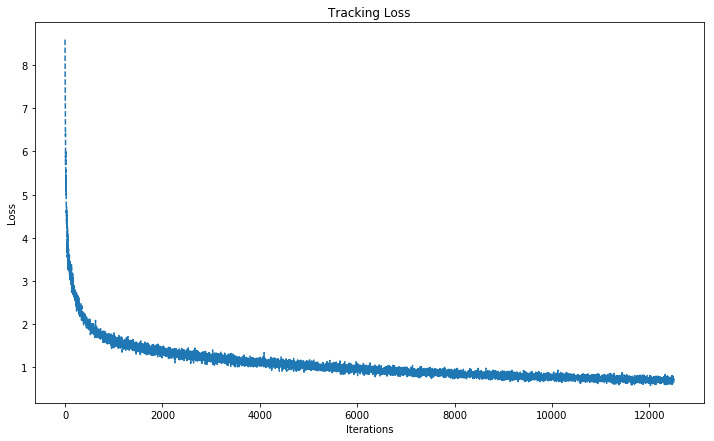

In [453]:
# Print results
plt.figure(figsize=(12,7))
plt.plot(lossAcum, '--', label='Loss')
plt.title('Tracking Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [454]:
# Make Prediction
testgame = [test_game]
# Feed in neural network test game
feed_test_game = {X: testgame}
# Run graph
logits = sess.run(model_output, feed_dict=feed_test_game)
# Make prediction
predictions = sess.run(prediction, feed_dict=feed_test_game)
print('Prediction location: {}'.format(predictions))

Prediction location: [1]


And to make it more visual, allow me to define a function to print the board. The following board depicts the test movement created to test the model

In [455]:
def display_board(board):
    symbols = ['o','-','x']
    board_symb = [int(x) + 1 for x in board]
    print(' ' + symbols[board_symb[0]] + ' | ' + symbols[board_symb[1]] + ' | ' + symbols[board_symb[2]])
    print('--- --- ---')
    print(' ' + symbols[board_symb[3]] + ' | ' + symbols[board_symb[4]] + ' | ' + symbols[board_symb[5]])
    print('--- --- ---')
    print(' ' + symbols[board_symb[6]] + ' | ' + symbols[board_symb[7]] + ' | ' + symbols[board_symb[8]])

In [456]:
display_board(testgame[0])

 - | - | -
--- --- ---
 o | - | x
--- --- ---
 x | o | o


Now let me show the borad with the predicted movement.

In [457]:
'''
Because test_game may contain more X or O, a correct predictor moves value is found (either 1 or -1)
'''
if np.sum(test_game) >= 1:
    # if there is more than X (+1), an opposite move should be played (-1).
    opponent_value = -1
else:
    # if there is more than 0 (-1), an opposite move should be played (+1).
    opponent_value = 1

# Add test_game list the predicted move
test_board_after_pred = test_game
test_board_after_pred[predictions.tolist()[0]] = opponent_value
display_board(test_board_after_pred)

 - | x | -
--- --- ---
 o | - | x
--- --- ---
 x | o | o


It's time to play against the model... <br>
Would you beat the machine model in the Tic Tac Toe game? <br><br>
Let's get started...

In [460]:
# Initial match
game = [0., 0., 0., 0., 0., 0., 0., 0., 0.]

numMoves = 0
totalMoves = 3
while numMoves < totalMoves:
    
    user = input('Your turn (you\'re X)... think carefully -> Introduce a number between (0-8):')
    numMoves += 1
    
    # Fill initial game with user moves
    game[int(user)] = 1.
    
    # Calculate posible moves according to user previous movemennt
    [possible_model_moves] = sess.run(model_output, feed_dict={X: [game]})
    
    # Find allowed moves (empty fields)
    allowed_moves = [ix for ix,x in enumerate(game) if x==0.0]
    
    # Find best move (max value of logits)
    model = np.argmax([x if ix in allowed_moves else -999.0 for ix,x in enumerate(possible_model_moves)])
    
    # Add model move to game
    game[int(model)] = -1.
    
    print ('//////////////////////////////')
    print('-> Neural Network (O) has moved in position: {}'.format(model))
    print_board(game)


Your turn (you're X)... think carefully -> Introduce a number between (0-8):0
//////////////////////////////
-> Neural Network (O) has moved in position: 6
 x |   |  
--- --- ---
   |   |  
--- --- ---
 o |   |  
Your turn (you're X)... think carefully -> Introduce a number between (0-8):5
//////////////////////////////
-> Neural Network (O) has moved in position: 2
 x |   | o
--- --- ---
   |   | x
--- --- ---
 o |   |  
Your turn (you're X)... think carefully -> Introduce a number between (0-8):4
//////////////////////////////
-> Neural Network (O) has moved in position: 7
 x |   | o
--- --- ---
   | x | x
--- --- ---
 o | o |  


### ___One more thing...___
So, if the computer would lose power after **many hours of training**, we would lose all of that work. One cool thing about Tensflow is allows to save partial results during training process in a binary files.  We should periodically save the variables and create checkpoint file to eventually restore the training process from the most recebt checkpoint if needed.

In [44]:
# Create a server
saver = tf.train.Saver()

lossAcum = []
batch_size = 200
n_epochs = 12500

for i in range(n_epochs):
    
    # Pick random values from training dataset
    rand_indices = np.random.choice(range(len(train_set)), batch_size, replace=False)
    
    # The batch data should be composed 
    batch_data = [train_set[i] for i in rand_indices]
    
    # Split data in moves and predicator
    x_input = [x[0] for x in batch_data]
    y_target = np.array([y[1] for y in batch_data])
    
    # Run graph with training data
    sess.run(train_step, feed_dict={X: x_input, Y: y_target})
    
    # Compute loss
    tempLoss = sess.run(loss, feed_dict={X: x_input, Y: y_target})
    lossAcum.append(tempLoss)
    if i%500==0:
        print('Iteration:\t{} \t\t Loss:\t{}'.format(str(i), str(tempLoss)))
    
    ''' To save your results partially, 
    please add and interpret the following 
    piece of code.'''
    # ---------------------
    # Save partial results
    if i%500==0:
        saver.save(sess, 'my_first_NN', global_step=i)
    
    # Simulate that at some point the process is suddenly stopped
    if i == 5000:
        break
        
saver.save(sess, 'my_first_NN', global_step=i, write_meta_graph=False)
sess.close()

Iteration:	0 		 Loss:	0.727125
Iteration:	500 		 Loss:	0.721791
Iteration:	1000 		 Loss:	0.695276
Iteration:	1500 		 Loss:	0.680659
Iteration:	2000 		 Loss:	0.659495
Iteration:	2500 		 Loss:	0.663703
Iteration:	3000 		 Loss:	0.64522
Iteration:	3500 		 Loss:	0.679455
Iteration:	4000 		 Loss:	0.656855
Iteration:	4500 		 Loss:	0.549333
Iteration:	5000 		 Loss:	0.722285


If one wished to recover the training from certain point, you may use the following code.

In [45]:
import os

sess = tf.Session()

# Verify if a checkpoint was correctly saved and exists
ckpt = tf.train.get_checkpoint_state(os.path.dirname('./'))

initial_step = 0
if ckpt and ckpt.model_checkpoint_path:
    
    # Restore from checkpoint
    saver.restore(sess, ckpt.model_checkpoint_path)
    # Get the last step during interrupted training process
    initial_step = int(ckpt.model_checkpoint_path.rsplit('-', 1)[1])
    
 
for i in range(initial_step, n_epochs):
    
    # Pick random values from training dataset
    rand_indices = np.random.choice(range(len(train_set)), batch_size, replace=False)
    
    # The batch data should be composed 
    batch_data = [train_set[i] for i in rand_indices]
    
    # Split data in moves and predicator
    x_input = [x[0] for x in batch_data]
    y_target = np.array([y[1] for y in batch_data])
    
    # Run graph with training data
    sess.run(train_step, feed_dict={X: x_input, Y: y_target})
    
    # Compute loss
    tempLoss = sess.run(loss, feed_dict={X: x_input, Y: y_target})
    lossAcum.append(tempLoss)
    if i%500==0:
        print('Iteration:\t{} \t\t Loss:\t{}'.format(str(i), str(tempLoss)))
        
sess.close()                      

INFO:tensorflow:Restoring parameters from ./my_first_NN-5000
Iteration:	5000 		 Loss:	0.643254
Iteration:	5500 		 Loss:	0.522033
Iteration:	6000 		 Loss:	0.579537
Iteration:	6500 		 Loss:	0.62023
Iteration:	7000 		 Loss:	0.577375
Iteration:	7500 		 Loss:	0.554304
Iteration:	8000 		 Loss:	0.538758
Iteration:	8500 		 Loss:	0.510386
Iteration:	9000 		 Loss:	0.493336
Iteration:	9500 		 Loss:	0.518605
Iteration:	10000 		 Loss:	0.575793
Iteration:	10500 		 Loss:	0.512544
Iteration:	11000 		 Loss:	0.514219
Iteration:	11500 		 Loss:	0.52143
Iteration:	12000 		 Loss:	0.501521


In [439]:
sess.close()